In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split as tts

In [3]:
time = pd.read_csv("E:\\ASSIGNMENT FROM EXCELR\\Simple Linear Regression\\delivery_time.csv")
time.head()
time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


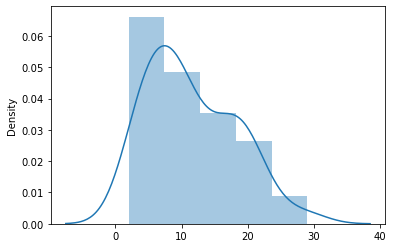

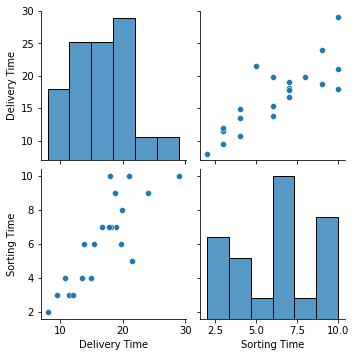

In [4]:
time.corr()
sns.distplot(time)
sns.pairplot(time)

In [5]:
time = time.rename(columns = {"Delivery Time":"dt","Sorting Time":"st" })
time.dtypes

dt    float64
st      int64
dtype: object

<AxesSubplot:xlabel='st', ylabel='dt'>

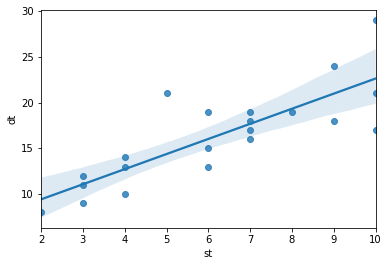

In [6]:
time = time.astype(int)
timem1 = smf.ols("dt~st", data = time).fit()
sns.regplot(x=time.st, y=time.dt, data = time)

In [7]:
timem1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     37.83
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           6.53e-06
Time:                        15:51:58   Log-Likelihood:                -52.204
No. Observations:                  21   AIC:                             108.4
Df Residuals:                      19   BIC:                             110.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0987      1.793      3.402      0.003       2.347       9.851
st             1.6533      0.269      6.151      0.000       1.091       2.216
==============================================================================
Omnibus:                        2.994   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                1.584
Skew:                           0.651   Prob(JB):                        0.453
Kurtosis:                       3.343   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
traind,testd=tts(time, test_size = 0.2)

In [9]:
def rmse(pred, act):
    return np.sqrt(np.mean((act-pred)**2))
trainm = smf.ols("dt~st", data = traind).fit()
trainpred = trainm.predict(traind)
trainact = traind.dt
trainerr = trainpred-trainact
trainrmse = rmse(trainpred, trainact)
trainrmse

3.0605965469971745

In [10]:
testpred = trainm.predict(testd)
testact = testd.dt
testerr = testpred-testact
testrmse = rmse(testpred, testact)
testrmse

2.5272909572746745

In [11]:
newtime = pd.Series([9,11])
predtime = pd.DataFrame(newtime, columns = ["st"])
timem1.predict(predtime)

0    20.978261
1    24.284819
dtype: float64